In [19]:
%autosave 60

Autosaving every 60 seconds


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore")

In [18]:
df = pd.read_excel("/content/raw_data.xlsx",
                         sheet_name='Daily Production Data', parse_dates=["DATEPRD"], index_col="DATEPRD")
df = df.sort_values(by="DATEPRD")
df

,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
DATEPRD,,,,,,,,,,,,,,,,,,,,,
2007-09-01,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-01,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-02,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-02,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2007-09-03,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-05,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2016-10-06,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI
2016-10-07,NO 15/9-F-4 AH,5693,15/9-F-4,3420717,VOLVE,369304,MÆRSK INSPIRER,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,injection,WI


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15634 entries, 2007-09-01 to 2016-12-01
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL_BORE_CODE            15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   NPD_FIELD_CODE            15634 non-null  int64  
 4   NPD_FIELD_NAME            15634 non-null  object 
 5   NPD_FACILITY_CODE         15634 non-null  int64  
 6   NPD_FACILITY_NAME         15634 non-null  object 
 7   ON_STREAM_HRS             15349 non-null  float64
 8   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 9   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 10  AVG_DP_TUBING             8980 non-null   float64
 11  AVG_ANNULUS_PRESS         7890 non-null   float64
 12  AVG_CHOKE_SIZE_P          8919 non-null   float64
 13  AVG_CHOKE_UOM             9161 non-null   ob

# Data Description
<div style="height190px">

| Abbreviation              | Description                                           |Units                  | Units (After Conversion)
|---------------------------|:-----------------------------------------------------:|:---------------------:|:-----------------------------:|
| DATEPRD                   | Date of Record                                       |  days                  | days                          |                           
| WELL_BORE_CODE           | Well Bore Code                                        | N/A                   | N/A                           |     
| NPD_WELL_BORE_CODE       | Norwegian Petroleum Directorate Well Bore Code        | N/A                   | N/A                           |
| NPD_WELL_BORE_NAME       | Norwegian Petroleum Directorate Well Bore Nmae        | N/A                   | N/A                           | 
| NPD_FIELD_CODE           | Norwegian Petroleum Directorate Field Code            | N/A                   | N/A                           |
| NPD_FIELD_NAME           | Norwegian Petroleum Directorate Field Name            | N/A                   | N/A                           |    
| NPD_FACILITY_CODE        | Norwegian Petroleum Directorate Facility Code         | N/A                   | N/A                           |
| NPD_FACILITY_NAME        | Norwegian Petroleum Directorate Facility Name         | N/A                   | N/A                           |
| ON_STREAM_HRS             | On stream hours                                       | hours                 | hours                         |
| AVG_DOWNHOLE_PRESSURE     | Average Downhole Pressure                             | bar                   | psi                          |
| AVG_DOWNHOLE_TEMPERATURE  | Average Downhole Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| AVG_DP_TUBING Average     | Differential Pressure of Tubing                       | bar                   | psi                          |
| AVG_ANNULUS_PRESS         | Average Annular Pressure                              | bar                   | psi                          |
| AVG_CHOKE_SIZE_P          | Average Choke Size Percentage                         | %                     | %                             |
| AVG_CHOKE_UOM             | Average Choke (Unit of Measure)                       | N/A                   | N/A                           |
| AVG_WHP_P                 | Average Wellhead Pressure                             | bar                   | psi                          |
| AVG_WHT_P                 | Average Wellhead Temperature                          | ◦C (degree Celsius)   | ◦F  (degree Fahrenheit)       |
| DP_CHOKE_SIZE             | Differential Pressure at the Choke                    | bar                   | psi                          |
| BORE_OIL_VOL              | Oil Volume from Well                                  | m<sup>3</sup>         | bbl                     |
| BORE_WAT_VOL              | Water Volume from Well                                | m<sup>3</sup>         | bbl                      |
| BORE_GAS_VOL              | Gas Volume from Well                                  | m<sup>3</sup>         | SCF (Standard Cubic Feet)                      |
| BORE_WI_VOL               | Water Volume Injected                                 | m<sup>3</sup>         | bbl                      |
| FLOW_KIND                 | Type of Flow (production or injection)                | N/A                   | N/A                           |
| WELL_TYPE                 | Type of Well (oil production or water injection)      | N/A                   | N/A                           |</div>
 

       
 
 
 
 
 
 
 
 
 

 

In [ ]:
# How many production & injection wells do we have?
df['WELL_BORE_CODE'].unique()

array(['NO 15/9-F-5 AH', 'NO 15/9-F-4 AH', 'NO 15/9-F-14 H',
       'NO 15/9-F-12 H', 'NO 15/9-F-11 H', 'NO 15/9-F-15 D',
       'NO 15/9-F-1 C'], dtype=object)

In [ ]:
# Which wells in the dataset are production wells and which ones are injection wells?

production_wells = df.query("FLOW_KIND == 'production'")['WELL_BORE_CODE'].unique()
injection_wells = df.query("FLOW_KIND == 'injection'")['WELL_BORE_CODE'].unique()

# print the results
print(f"Production wells: {production_wells}")
print(f"Injection wells: {injection_wells}")

Production wells: ['NO 15/9-F-14 H' 'NO 15/9-F-12 H' 'NO 15/9-F-11 H' 'NO 15/9-F-15 D'
 'NO 15/9-F-1 C' 'NO 15/9-F-5 AH']
Injection wells: ['NO 15/9-F-5 AH' 'NO 15/9-F-4 AH']


In [ ]:
# extract the production data for 'NO 15/9-F-14 H and injection data for well 'NO 15/9-F-4 AH' & 'NO 15/9-F-5 AH'
F_14 = df.query("WELL_BORE_CODE == 'NO 15/9-F-14 H'").copy()
F_4 = (df.query("WELL_BORE_CODE == 'NO 15/9-F-4 AH'").copy()
        [['ON_STREAM_HRS','BORE_WI_VOL']])
F_5 = (df.query("WELL_BORE_CODE == 'NO 15/9-F-5 AH'").copy()
        [['ON_STREAM_HRS','BORE_WI_VOL']])

In [ ]:
# Rename the column ON_STREAM_HRS for injection wells to avoid conflicts with ON_STREAM_HRS for production when merging the dataframes
F_4 = F_4.rename(columns={"ON_STREAM_HRS":"F_4_ON_STREAM_HRS", "BORE_WI_VOL":"F_4_BORE_WI_VOL"})
F_5 = F_5.rename(columns={"ON_STREAM_HRS":"F_5_ON_STREAM_HRS", "BORE_WI_VOL":"F_5_BORE_WI_VOL"})

In [ ]:
# merging the production and injection data
df = pd.concat([F_14, F_4, F_5], axis=1)

In [ ]:
# removing irrelevent variables
df = df.drop(['WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME','AVG_CHOKE_UOM','BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'], axis = 1)

In [ ]:
# convert the SI units to field units 
df["AVG_DOWNHOLE_PRESSURE"] = df["AVG_DOWNHOLE_PRESSURE"] * 14.5037738
df["AVG_WHP_P"]  = df["AVG_WHP_P"] * 14.5037738
df['AVG_DP_TUBING'] = df["AVG_DP_TUBING"] * 14.5037738
df["DP_CHOKE_SIZE"] = df["DP_CHOKE_SIZE"] * 14.5037738
df['AVG_ANNULUS_PRESS'] = df['AVG_ANNULUS_PRESS'] * 14.5037738
df["AVG_DOWNHOLE_TEMPERATURE"] = (df["AVG_DOWNHOLE_TEMPERATURE"] * (9/5)) + 32
df["AVG_WHT_P"] = (df["AVG_WHT_P"] * (9/5)) + 32
df["BORE_OIL_VOL"]  = df["BORE_OIL_VOL"] * 6.2898106
df["BORE_WAT_VOL"] = df["BORE_WAT_VOL"]  * 6.2898106
df["BORE_GAS_VOL"]  = df["BORE_GAS_VOL"] * 35.31466672148859
df["F_4_BORE_WI_VOL"] = df["F_4_BORE_WI_VOL"] * 6.2898106
df["F_5_BORE_WI_VOL"] =  df["F_5_BORE_WI_VOL"] * 6.2898106

* References for units conversion: [Rigzone](https://www.rigzone.com/calculator/default.asp#calc)/ [DrillingFormulas](https://www.drillingformulas.com/temperature-conversion-formulas/)/ [PETROLEUM OFFICE](https://petroleumoffice.com/unitconverter/volume-flow-rate/)

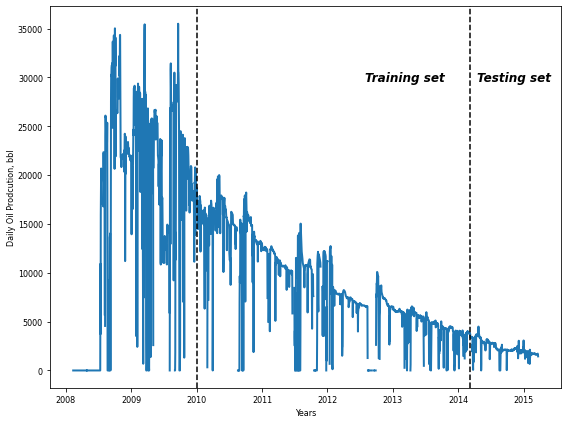

In [ ]:
# display the production profile for well 'F-14'
# fig, ax = plt.subplots(1, 1, figsize=(140/25.4,90/25.4))
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plt.plot(df['BORE_OIL_VOL'][:'2015-03-23'], linewidth =1)

# create the horizontal dashed line
plt.axvline(x=pd.to_datetime('2010-01-01'), color='black', linestyle='--')
plt.axvline(x=pd.to_datetime('2014-03-07'), color='black', linestyle='--')
#add text labels
plt.text(pd.to_datetime('2012-08-01'), 30000, 'Training set',
         fontsize=12, rotation=0, verticalalignment='center', style='italic', fontweight='bold')
plt.text(pd.to_datetime('2014-04-15'), 30000, 'Testing set',
         fontsize=12, rotation=0, verticalalignment='center', style='italic', fontweight='bold')
#  # add axis labels
plt.ylabel(r'Daily Oil Prodcution, bbl', fontsize=8,labelpad=1.5)
plt.xlabel('Years', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
# plt.subplots_adjust(hspace=0.1, wspace=0.1)

# plt.savefig("Oil production profile for well NO159–F–14H .jpeg",
#                 dpi=1000, bbox_inches='tight')
plt.show()

In [ ]:
#Select only the period between 2010/1/1 and 2015/3/23 because it represents the production decline stage
#This period shares similar characteristics with the forecasting period in the testing set
df = df['2010-01-01':'2015-03-23'] 
df.shape

(1908, 16)

In [ ]:
# calculate te number of days that we are suppose duriing the selected period 
# To ensure that we dont have missing days
from datetime import date
f_date = date(2010, 1, 1)
l_date = date(2015, 3, 23)
delta = l_date - f_date
print(delta.days + 1) # no missing days

1908


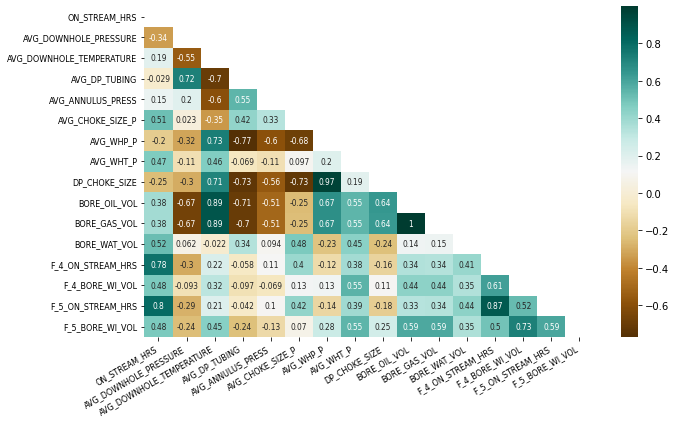

In [ ]:
mask = np.triu(np.ones_like(df.corr(method='spearman')))
# plt.figure(figsize=(220/25.5,120/25.5 ))
plt.figure(figsize=(10,6))
correlation_mat = df.corr("spearman")
ax = sns.heatmap(correlation_mat, annot = True, cmap='BrBG', mask=mask,annot_kws={"fontsize": 7.5})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);


plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.01)

# plt.savefig("Spearman correlation coefficients of the raw production and injection data .jpeg",
#                 dpi=2000, bbox_inches='tight')
plt.show()

Spearman's rank correlation analysis indicates that the majority of the variables exhibit a consistent monotonic relationship with the response variable. This suggests that these variables can be useful in predicting the oil rate through forecasting methods.

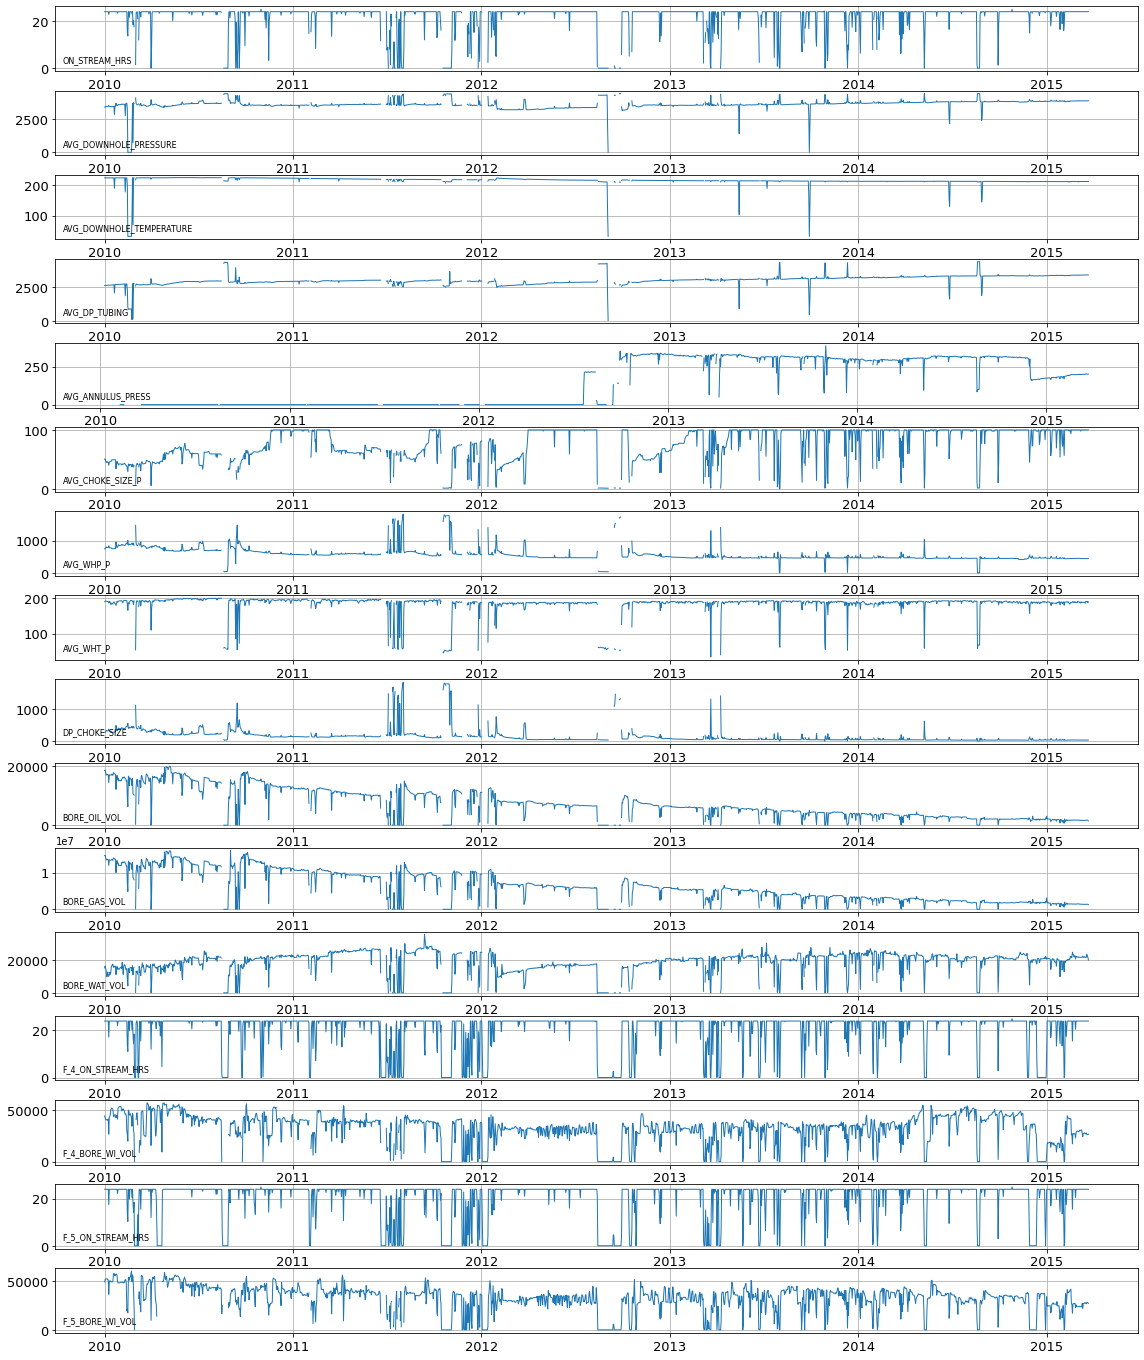

In [ ]:
# fig, axs = plt.subplots(nrows=len(df.columns), figsize=(280/25.5, 280*1.2/25.5), sharex=True)
fig, axs = plt.subplots(nrows=len(df.columns), figsize=(16, 19), sharex=False)
axs = axs.ravel()

for id, column in enumerate(df.columns):

    axs[id].plot(df[column], linewidth =1)
    axs[id].grid(True)


    axs[id].legend([column], loc='lower left', fontsize=8, handlelength=0, handletextpad=0, frameon=False)

for ax in axs:
    ax.tick_params(labelsize=13)
    ax.xaxis.label.set_size(13)
    ax.yaxis.label.set_size(13)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0.1)

# plt.savefig("Raw production and injection data for 16 variables from the Volve oil field, spanning the period from 2010 to 2015.jpeg",
#                 dpi=1000, bbox_inches='tight')

plt.show()


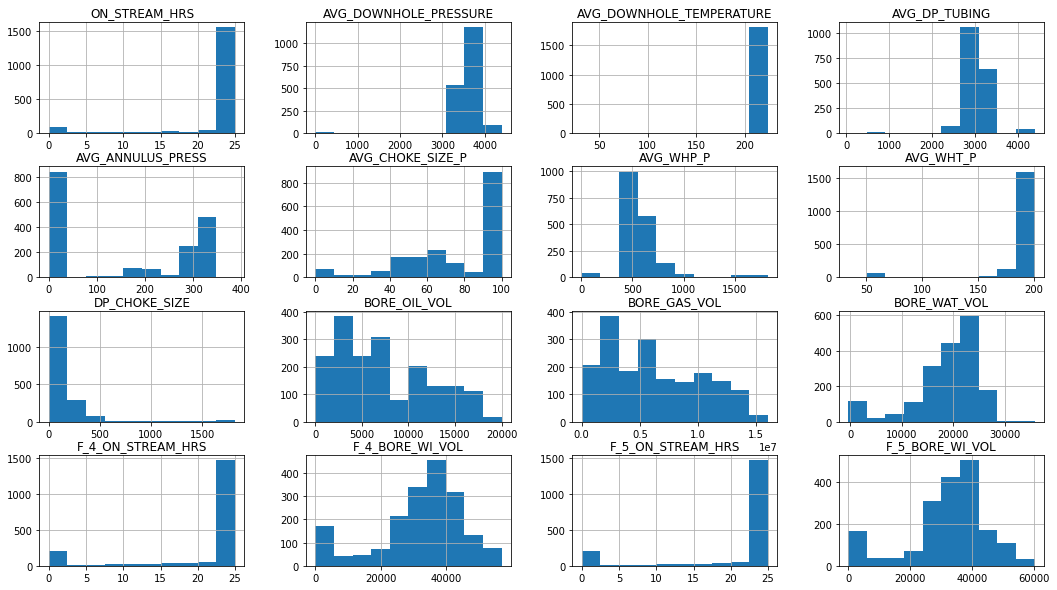

In [ ]:
df.hist(figsize=(18,10))
plt.show()

In [ ]:
#check the data range constraints, data distribution, and the presence of outliers.
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
count,1828.000000,1828.000000,1828.000000,1828.000000,1764.000000,1802.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03,1828.000000,1908.000000,1862.000000,1908.000000,1855.000000
mean,21.841193,3583.535031,214.625146,3019.578691,150.044131,75.926647,572.536377,183.015493,152.270115,7261.418839,6.145965e+06,18826.746730,20.318801,31966.662247,20.354637,32030.073489
std,6.049317,373.637560,16.012126,354.479368,149.043042,27.848957,219.312316,29.148980,239.001866,5028.465623,4.125306e+06,6465.248079,7.832144,13563.536469,7.831526,13098.199268
min,0.000000,0.000000,32.000000,39.914966,0.000000,0.000000,4.962176,33.784862,0.914898,0.000000,0.000000e+00,-372.293889,0.000000,0.000000,0.000000,0.000000
25%,24.000000,3507.717504,212.045240,2869.027307,0.000000,58.209641,466.837358,186.971179,42.193006,2982.109277,2.482519e+06,16688.534322,23.660412,27193.841709,23.976393,27747.420619
50%,24.000000,3573.179417,214.761736,2985.324683,166.504338,87.925927,502.575163,189.891963,76.842538,6274.400564,5.642409e+06,20839.337582,24.000000,34665.079944,24.000000,34828.075900
75%,24.000000,3730.074164,219.996743,3208.012793,312.228731,100.000000,608.024884,192.529627,164.022008,11186.679745,9.664422e+06,22753.562815,24.000000,40332.545356,24.000000,39781.794083
max,25.000000,4395.827404,224.190920,4381.731622,386.993210,100.000000,1823.393702,200.317251,1823.393702,20005.937677,1.602415e+07,35800.155279,25.000000,56823.379072,25.000000,60050.679482


In [ ]:
# check how many missing values we have in each variable
df.isnull().sum()

ON_STREAM_HRS                80
AVG_DOWNHOLE_PRESSURE        80
AVG_DOWNHOLE_TEMPERATURE     80
AVG_DP_TUBING                80
AVG_ANNULUS_PRESS           144
AVG_CHOKE_SIZE_P            106
AVG_WHP_P                    80
AVG_WHT_P                    80
DP_CHOKE_SIZE                80
BORE_OIL_VOL                 80
BORE_GAS_VOL                 80
BORE_WAT_VOL                 80
F_4_ON_STREAM_HRS             0
F_4_BORE_WI_VOL              46
F_5_ON_STREAM_HRS             0
F_5_BORE_WI_VOL              53
dtype: int64

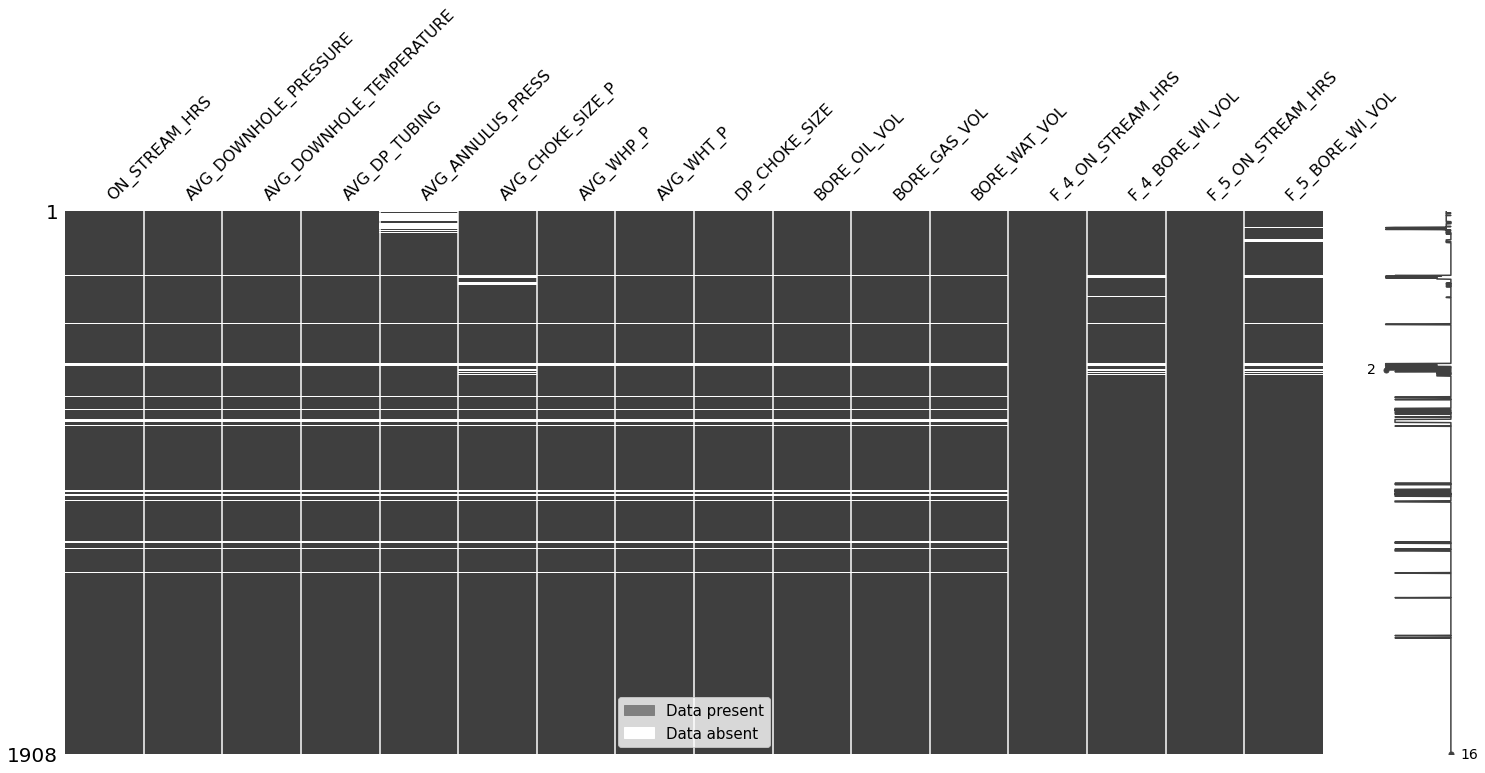

In [ ]:
#Visualize the missingness pattern
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
plt.legend(handles=[gray_patch, white_patch],fontsize=15 )
# plt.savefig("MTS missing values.jpeg", dpi=1600, bbox_inches='tight')
plt.show()

In [ ]:
# display rows that have at least one NaN 
df[df.isnull().any(axis=1)]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2010-01-01,24.0,3378.643673,223.079164,2629.075052,NaN,50.150825,749.568621,190.264943,271.390953,18593.749401,1.462166e+07,15304.241356,24.00000,44109.287732,24.00000,49054.221066
2010-01-02,24.0,3377.769461,223.095696,2633.104681,NaN,50.694654,744.664780,190.708397,266.368677,18701.242265,1.469266e+07,16519.118273,24.00000,41936.969541,24.00000,51515.296516
2010-01-03,24.0,3408.561097,223.074953,2633.733679,NaN,47.665676,774.827418,192.268341,299.398157,17799.912406,1.400904e+07,14796.150455,24.00000,41114.572918,24.00000,51717.286427
2010-01-04,24.0,3439.266918,223.022721,2633.106376,NaN,44.706230,806.160543,191.994925,333.246980,17002.616014,1.341015e+07,13428.619835,24.00000,40267.292699,24.00000,51948.640243
2010-01-05,24.0,3429.064568,223.035833,2636.328873,NaN,45.743761,792.735696,191.503603,318.470614,17270.939334,1.361768e+07,9839.905499,24.00000,40524.238503,24.00000,52129.744099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.00000,0.000000
2013-06-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.40833,1883.720100,2.40833,2014.459752
2013-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.00000,0.000000


The analysis of the plots and summary statistics revealed the presence of missing values and outliers in the data. Although the proportion of missing values is relatively low, they cannot be eliminated as each value contributes to the decline rate in oil. Since many missing values are located close together, interpolation or forward-backward imputation technique is planned to be used in the cleaning stage, which will be decided based on neighboring values.

Some missing values fall within the shut-in period, which significantly impacts oil production in the following days. Outliers are identified as measurement errors, such as on-stream hours greater than 24, reservoir pressure or temperature equal to zero, wellhead pressure greater than reservoir pressure, wellhead temperature greater than reservoir temperature, and oil/water/gas volume greater than zero when it should be zero when on-stream hours or average choke size is zero.

outliers are identified by looking for any changes in a variable that did not correspond to changes in other influencing variables. For instance, gas production is a result of oil production, and both should exhibit consistent behavior since the gas production type in this reservoir is a solution dissolved in oil. In other words, a change in oil should lead to a change in gas.

Annular pressure and pressure drop in the tubing will be discarded, as annular pressure mostly contains constant values, and the effect of pressure drop in the tubing is already captured by wellhead pressure and reservoir pressure, providing no new information.

The broad range of data illustrates the value and applicability of this project to a large portion of conventional oil fields.


In [ ]:
#find duplicated records
#first, remove the missing values from df, as rows that entirely have missing values are considered duplicates
df[~df.isnull().any(axis=1)].loc[df.duplicated()]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,F_4_ON_STREAM_HRS,F_4_BORE_WI_VOL,F_5_ON_STREAM_HRS,F_5_BORE_WI_VOL
DATEPRD,,,,,,,,,,,,,,,,
2011-10-28,0.0,4359.431199,210.871148,2586.710928,0.000000,1.07424,1772.720272,50.255438,1772.720272,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-29,0.0,4359.431199,210.871148,2586.710928,0.000000,1.07424,1772.720272,50.255438,1772.720272,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-08-22,0.0,4386.874080,210.091874,4381.731622,99.511117,1.28336,5.142458,67.619282,0.914898,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-08-23,0.0,4386.874080,210.091874,4381.731622,99.511117,1.28336,5.142458,67.619282,0.914898,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-08-24,0.0,4386.874080,210.091874,4381.731622,99.511117,1.28336,5.142458,67.619282,0.914898,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Analyze the effect of injection wells on the production rate

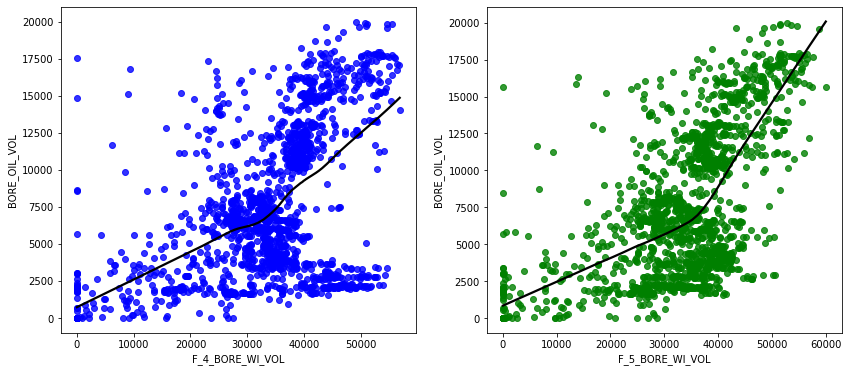

In [ ]:
# use Lowess(locally weighted scatterplot smoothing) to estimate the underlying trend of paired (x, y)
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
sns.regplot(x = 'F_4_BORE_WI_VOL', y = "BORE_OIL_VOL", data=df, lowess=True,
            scatter_kws={'color': 'blue'}, line_kws={'color': 'black'}, ax=axs[0])
sns.regplot(x = 'F_5_BORE_WI_VOL', y = "BORE_OIL_VOL", data=df, lowess=True,
            scatter_kws={'color': 'green'}, line_kws={'color': 'black'}, ax=axs[1])
plt.show()

In [ ]:
#compute the Cross Correlation Function (CCF)
# Use CCF to examine the influence of lead/lag values of injection rates on the oil production
#create a copy of the df that only includes the oil and injection rates
#one-order difference 'BORE_OIL_VOL' to remove the effects of the trend 
ccf = df[['BORE_OIL_VOL','F_4_BORE_WI_VOL','F_5_BORE_WI_VOL']].copy()
ccf['BORE_OIL_VOL'] = ccf['BORE_OIL_VOL'].diff().shift(-1)
ccf['F_4_BORE_WI_VOL'] = ccf['F_4_BORE_WI_VOL'].shift(-1)
ccf['F_5_BORE_WI_VOL'] = ccf['F_5_BORE_WI_VOL'].shift(-1)
ccf = ccf.dropna()

In [ ]:
!pip install rpy2==3.5.1


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%R -i ccf

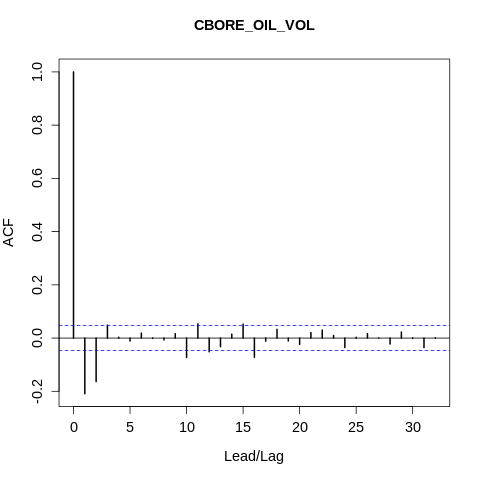

In [ ]:
%%R
ccf1 <- acf(ccf$BORE_OIL_VOL, lwd = 2,
           xlab = 'Lead/Lag',
           ylab = 'ACF',
           main = "CBORE_OIL_VOL",
           cex.lab = 1.2, cex.axis = 1.2, cex.main = 1.2)

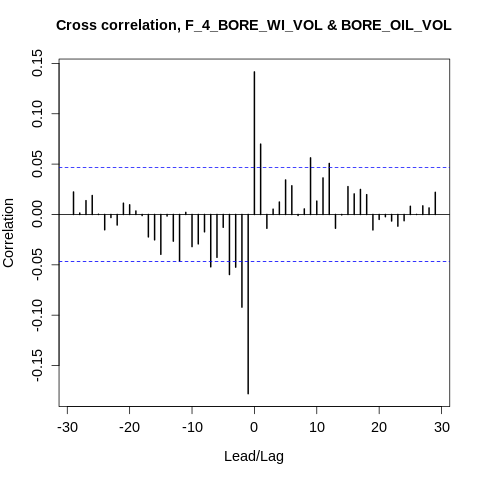

In [ ]:
%%R
ccf1 <- ccf(ccf$F_4_BORE_WI_VOL, ccf$BORE_OIL_VOL, lwd = 2,
           xlab = 'Lead/Lag',
           ylab = 'Correlation',
           main = "Cross correlation, F_4_BORE_WI_VOL & BORE_OIL_VOL",
           cex.lab = 1.2, cex.axis = 1.2, cex.main = 1.2)

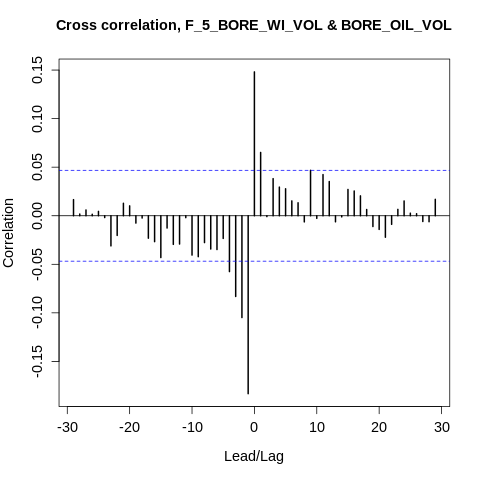

In [ ]:
%%R
ccf2 <- ccf(ccf$F_5_BORE_WI_VOL, ccf$BORE_OIL_VOL, lwd = 2,
           xlab = 'Lead/Lag',
           ylab = 'Correlation',
           main = "Cross correlation, F_5_BORE_WI_VOL & BORE_OIL_VOL",
           cex.lab = 1.2, cex.axis = 1.2, cex.main = 1.2)


In [ ]:
df.to_csv("F_14.csv")